# REPORTE 5

**PARTE 1: ENSAYO**

En este paper, Dancourt pone sobre el debate un recuento de una serie de instrumentos de política monetaria empleados por el Bancon central de Reserva del Perú (BCR) durante 2002-2013. Los insturmentos analizados son: los requirimientos obligatorios de reserva, la tasa referencial de interés y la intervención esterilizada en el mercado de divisas. En esa misma linea, el autor analiza que gacias a estas estategias, el banco construyó un sistema de inflación objetivo y un plan para acumular reservas suficientes de divisas. Además, el autor explica  las dos principales formas en las que la política monetaria influye en el dia a dia: el crédito y el tipo de cambio.

En ese sentido, el autor resalta el gran desarrollo y el manejo macroeconomico del Perú desde el gobierno de Toledo por lo que se pregunta ¿Qué instrumentos de política monetaria empleó el Banco Central de Reserva del Perú durante el periodo 2002-2013 para combatir la inflación?. Siguiendo esa línea, la principal fortaleza del artículo es que explora y explica cada uno de estos instrumentos de política monetaria, demostrando cómo, por ejemplo, la reducción de la tasa referencial de interés puede ayudar a mitigar los efectos de un shock externo adverso de demanda. Tambien analiza cómo, el aumentar los requerimientos obligatorios de reservas a los bancos privados, puede ayudar a controlar una posible crisis bancaria por una excesiva dolarización de esta entidades.Además, otra fortaleza a resaltar son las fuentes de consulta del autor y que el mismo fue presidente y vicepresidente del BCR durante este periodo. Sin embargo, una de las debilidades del articulo puede ser el lenguaje economico que puede complicar algunas situaciones y lo complicado que es acceder a información monetaria en paises en vias de desarrollo como  la intervención en divisas que no suele estar disponible públicamente para los países emergentes.

Una contribución del autor es que basicamente recopila las grandes herramientas macroeconomicas que mantenieron la estabilidad del pais de 2002 a 2013 y que pueden ser útiles al momento de combatir recesiones económicas generadas por inestabilidades en la economía internacional. Julio velarde enfatizó que el sol peruano se mantiene entre las divisas de mejor desempeño entre los países emergentes frente a la fortaleza del dólar, en ese sentido, uno de los siguientes pasos debería ser continuar con estas mismas estrategias o que se evaluen nuevas que sigan manteniendo el buen manejo macroeconomico del pais.

**PARTE 2: CÓDIGO**

In [46]:
import matplotlib.pyplot as plt
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel
import ipywidgets as widgets
from sympy import *
from causalgraphicalmodels import CausalGraphicalModel

- Encuentre las ecuaciones de Ingreso $(Y^e)$, tasa de interés $(r^e)$, $(P^e)$ de equilibrio (Escriba paso a paso la derivación de estas ecuaciones).

**Ingreso $(Y^e)$**

Primero se necesita encontrar la función de Demanda Agregada (DA) que se encuentra al momento de igualar los modelos de IS-LM

$$ \frac{β_0}{h} - \frac{β_1}{h}Y = -\frac{1}{j} \frac{M_o}{P} + \frac{k}{j}Y $$

Despejamos P:
    
$$ P = \frac{h(M_o)}{- j(β_0) + (kh + jβ_1)Y} $$

Teniendo en cuenta el modelo para la curva de oferta monetaria:
$$ M_s = M_o - P $$

Podemos concluir que el equilibrio en el mercado monetario se da por: 
$$ M_o - P = kY - jr $$

Se despeja r y lo igualamos a la curva IS en función de P:

$$  P = \frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y $$

Seguimos con la función de la Oferta Agregada (a corto plazo) que viene dado por:
$$ P = P^e + θ(Y - \bar{Y}) $$

En ese sentido, para hallar la curva de Ingreso de Equilibrio $(Y^e)$ igualamos DA - OG:

$$ P^e + θY - \bar{Y}θ = \frac{hMo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y $$

Despejado en función de Y:

$$ Y^e = \frac{1}{θ + \frac{jB_1 + hk}{h}}(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y}) $$

**Tasa de Interes $(r^e)$** 

Se iguala IS-LM teniendo en cuenta $M_s = M_o - P$ y se despeja r para hallar la tasa de interes

$$ \frac{β_0 - rh}{β_1} = \frac{rj}{k} + \frac{M_o}{k} - \frac{P}{k} $$

$$ β_0k - rhk = rβ_1j + β_1(M_o) - P(β_1) $$

$$ r^e = \frac{β_0k}{β_1j + hk} - \frac{β_1(M_o - P)}{β_1j + hk} $$


**Precio de Equilibrio $(P^e)$**

Hallamos el Precio de equilibrio ($P^e$) en donde se reemplaza el ingreso de equilibrio $(Y^e)$ en la OG:

$$ P_q^e = P^e + θ(Y - \bar{Y}) $$

$$ P_q^e = P^e + θ(\frac{1}{θ + \frac{jB_1 + hk}{h}}(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y} - \bar{Y}) $$

**GRAFICO**

In [47]:
#1--------------------------
    # Demanda Agregada
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada
    
# Parámetros

Y_size = 100

Pe = 100 
θ = 3
_Y = 20   

Y = np.arange(Y_size)


# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [P_AD[0], Y[0]] #Inicio
B = [P_AD[-1], Y[-1]] #Fin

C = [P_AS[0], Y[0]] #Inicio
D = [P_AS[-1], Y[-1]] #Fin

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(192.39043824701196, 50.79681274900399)

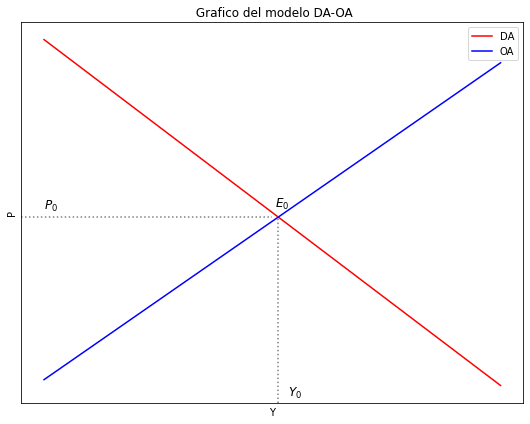

In [48]:
# Gráfico del modelo DA-OA

# Dimensiones del gráfico
y_max = np.max(P)
fig, ax = plt.subplots(figsize=(9, 7))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "DA", color = "red") #DA
ax.plot(Y, P_AS, label = "OA", color = "blue") #OA

# Líneas punteadas
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1],  ymin= 0, ymax= 0.49, linestyle = ":", color = "grey")

# texto
plt.text(0, 200, '$P_0$', fontsize = 12, color = 'black')
plt.text(53, 25, '$Y_0$', fontsize = 12, color = 'black')
plt.text(50, 202, '$E_0$', fontsize = 12, color = 'black')


ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title=" Grafico del modelo DA-OA", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()

**Estatica comparativa**

- Analice los efectos sobre las variables endógenas P y r de una disminución del gasto fiscal $(∆G_0 < 0)$. El análisis debe ser intuitivo, matemático y gráfico. En una figura, se debe que usar los ejes r e Y (modelo IS-LM), y en la otra, los ejes P y r (modelo DA-OA).

**Intuición**

En el modelo IS-LM: 

Cuando el Gasto Fiscal cae tambien genera una caída en la Demanda Agregada, es por ello que se genera un desequilibrio, donde el nivel de producción resulta mayor a la demanda agregada. Por lo  que, para regresar al equilibrio (DA = Y), el nivel de producción debe ajustarse a la demanda.

La disminución de producción genera una disminución tambien en la demanda de dinero (Md = kY - jr). Esto genera un desequilibrio, debido a que, la oferta de dinero no se altera, por ende, la demanda resulta menor a la oferta. Entonces, para regresar al equilibrio (Md = Ms), se ajusta la tasa de interés, de modo que esta debe bajar, para así poder estabilizar la demanda.

$$ G_o↓ → DA↓ → DA < Y → Y↓ $$
$$ Y↓ → Md↓ → Md < Ms → r↓ $$

En el modelo DA-OA:

La disminución en la producción genera que el nivel de precios también se reduzca:

$$ Y↓ → θ(Y - \bar{Y})↓ → P↓ $$

In [49]:
#Matemática

#nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

k, j, Ms, P, Y = symbols('k j Ms P Y')

#Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

#Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

df_Y_eq_Go = diff(Y_eq, Go)
df_Y_eq_Go

j/(h*k + j*(-(1 - t)*(b - m) + 1))

In [50]:
df_r_eq_Go = diff(r_eq, Go)
df_r_eq_Go

k/(h*k + j*(-(1 - t)*(b - m) + 1))

In [51]:
#Modelo DA-OA

# nombrar variables como símbolos
h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ  = symbols('h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (((h*Ms+j*beta_0)/h) - (Pe + θ*_Y))/(θ - ((j*beta_1+h*r)/h))
P_eq = ((h*Ms+j*beta_0)/h) - (((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ))

In [52]:
df_Y_eq_Go = diff(Y_eq, Go)
df_Y_eq_Go

j/(h*(θ - (h*r + j*(-(1 - t)*(b - m) + 1))/h))

In [53]:
df_P_eq_Go = diff(P_eq, Go)
df_P_eq_Go

j/h

In [54]:
# IS-LM

#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva IS: dismonución del gasto fiscal (Go)

# Definir SOLO el parámetro cambiado
Go = 25

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_Go = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

In [55]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [r[0], Y[0]] 
B = [r[-1], Y[-1]] 

C = [i[0], Y[0]] 
D = [i[-1], Y[-1]] 

E = [r_Go[0], Y[0]]
F = [r_Go[-1], Y[-1]] 

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

intersec2 = line_intersection((E, F), (C, D))
intersec2

(68.1297709923664, 46.5648854961832)

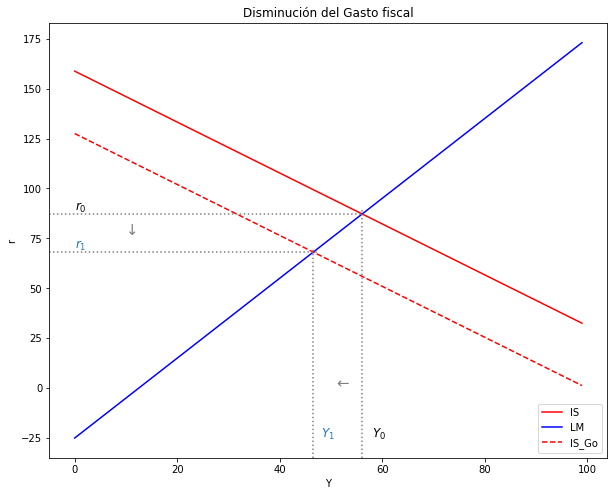

In [56]:
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))
#---------------------------------
    # Gráfico 1: IS-LM
    
ax.plot(Y, r, label = "IS", color = "red") #IS
ax.plot(Y, i, label="LM", color = "blue")  #LM
ax.plot(Y, r_Go, label="IS_Go", color = "red", linestyle ='dashed')  #IS

ax.axvline(x=intersec[1],  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
ax.axvline(x=intersec2[1],  ymin= 0, ymax= 0.48, linestyle = ":", color = "grey")
ax.axhline(y=intersec2[0],  xmin= 0, xmax= 0.48, linestyle = ":", color = "grey")
ax.axhline(y=intersec[0],  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax.text(51, 0, '←', fontsize=15, color='grey')
ax.text(10, 77, '↓', fontsize=15, color='grey')
ax.text(58, -25, '$Y_0$', fontsize=12, color='black')
ax.text(48, -25, '$Y_1$', fontsize=12, color='C0')
ax.text(0, 89, '$r_0$', fontsize=12, color='black')
ax.text(0, 70, '$r_1$', fontsize=12, color='C0')


ax.set(title="Disminución del Gasto fiscal", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

- Analice los efectos sobre las variables endógenas P y r de una disminución de la masa monetaria $(∆M^s < 0)$ . El análisis debe ser intuitivo, matemático y gráfico. En una figura, se debe que usar los ejes r e Y (modelo IS-LM), y en la otra, los ejes P y r (modelo DA-OA).

**Intuición:**

*Qué sucede en el modelo IS-LM:*

$$ M_s↓ → M_s < M_d → r↑ $$

$$ r↑ → I↓ → DA↓ → DA < Y → Y↓ $$


:.Entonces, en el modelo OA-DA:

$$ Y↓ → [P^e + θ(Y↓ -\bar{Y})] → [P^e + θ(Y -\bar{Y})↓] → P↓ → P^e↓ $$

**Gráfico**

In [57]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [58]:
# Definir SOLO el parámetro cambiado
Ms = 100

# Generar nueva curva LM con la variacion del Ms
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

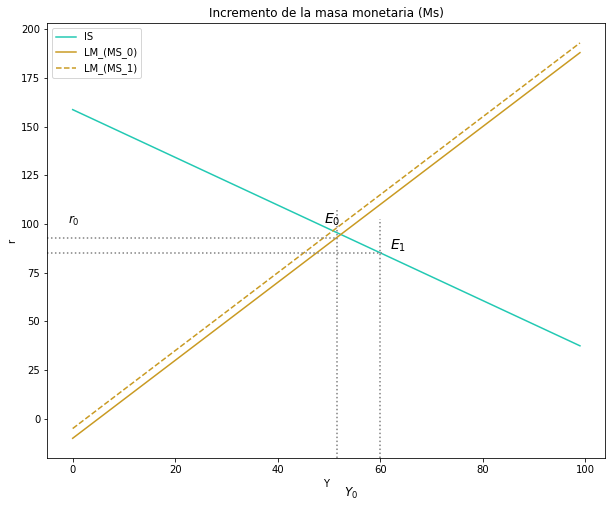

In [59]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "#22c9b3") #IS_orginal
ax.plot(Y, i, label="LM_(MS_0)", color = "#c99a22")  #LM_original

ax.plot(Y, i_Ms, label="LM_(MS_1)", color = "#c99a22", linestyle = 'dashed')  #LM_modificada

# Lineas de equilibrio_0 
plt.axvline(x=51.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Lineas de equilibrio_1 
plt.axvline(x=60,  ymin= 0, ymax= 0.55, linestyle = ":", color = "grey")
plt.axhline(y=85, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(62,87, '$E_1$', fontsize = 14, color = 'black')

#plt.axhline(y=68, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Textos ploteados
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
#plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Incremento de la masa monetaria (Ms)", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

- Analice los efectos sobre las variables endógenas Y, P y r de un incremento de la tasa de impuestos. . El análisis debe ser intuitivo, matemático y gráfico. En una figura, se debe que usar los ejes r e Y (modelo IS-LM), y en la otra, los ejes P, Y (modelo DA-OA).


**Intuición**

*Qué sucede en el modelo IS-LM:*

$$ t↑ → C↓ → DA↓ → DA < Y → Y↓$$

$$ Y↓ → M^d↓  → M^d < M^s → r↓$$


:.Entonces, en el modelo OA-DA:

$$ Y↓ → P↓ → P^e↓ $$

**Gráfico*

In [60]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [61]:
#--------------------------------------------------
    # NUEVA curva IS: incremento en la tasa de impuestos (t)
    
# Definir SOLO el parámetro cambiado
t = 0.95

# Generar la ecuación con el nuevo parámetro
def r_IS_t(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_t = r_IS_t(b, m, t, Co, Io, Go, Xo, h, Y)

In [62]:
#DA-OA

#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.1

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

#--------------------------------------------------
    # NUEVA Demanda Agregada

# Definir SOLO el parámetro cambiado

t = 0.97

# Generar la ecuación con el nuevo parámetro

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD_t(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_t = P_AD_t(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

<function matplotlib.pyplot.show(close=None, block=None)>

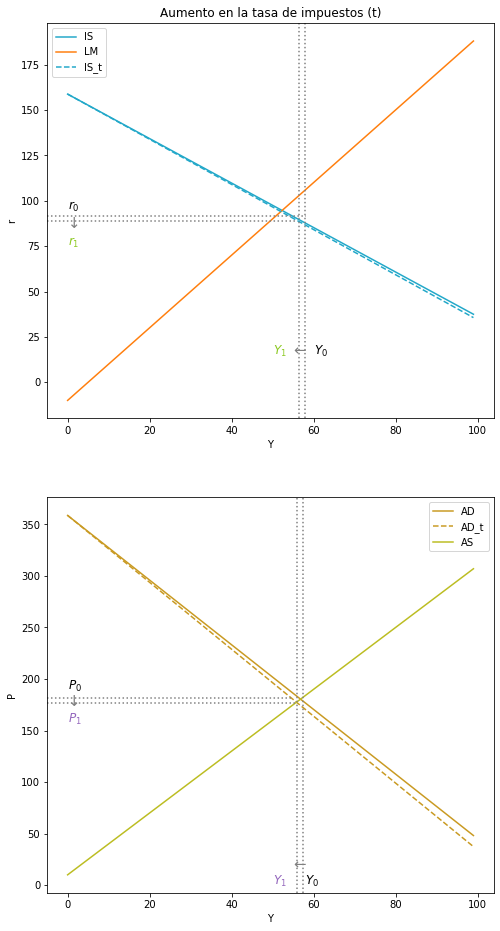

In [63]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: IS-LM
    
ax1.plot(Y, r, label = "IS", color = "#22a8c9") #IS
ax1.plot(Y, i, label="LM", color = "C1")  #LM
ax1.plot(Y, r_t, label="IS_t", color = "#22a8c9", linestyle ='dashed')  #LM

ax1.axvline(x=56.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axvline(x=58,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axhline(y=88.9,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")
ax1.axhline(y=91.5,  xmin= 0, xmax= 0.58, linestyle = ":", color = "grey")

ax1.text(55, 15, '←', fontsize=15, color='grey')
ax1.text(0, 85, '↓', fontsize=15, color='grey')
ax1.text(60, 15, '$Y_0$', fontsize=12, color='black')
ax1.text(50, 15, '$Y_1$', fontsize=12, color='#8cc922')
ax1.text(0, 95, '$r_0$', fontsize=12, color='black')
ax1.text(0, 75, '$r_1$', fontsize=12, color='#8cc922')


ax1.set(title="Aumento en la tasa de impuestos (t)", xlabel= r'Y', ylabel= r'r')
ax1.legend()


#---------------------------------
    # Gráfico 2: DA-OA

ax2.plot(Y, P_AD, label = "AD", color = "#c99a22") #DA
ax2.plot(Y, P_t, label = "AD_t", color = "#c99a22", linestyle = 'dashed') #DA_Ms
ax2.plot(Y, P_AS, label = "AS", color = "C8") #OA

ax2.axvline(x=57.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axhline(y=182,  xmin= 0, xmax= 0.55, linestyle = ":", color = "grey")
ax2.axhline(y=176.5,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax2.text(55, 15, '←', fontsize=15, color='grey')
ax2.text(0, 174, '↓', fontsize=15, color='grey')

ax2.text(58, 0, '$Y_0$', fontsize=12, color='black')
ax2.text(50, 0, '$Y_1$', fontsize=12, color='C4')
ax2.text(0, 190, '$P_0$', fontsize=12, color='black')
ax2.text(0, 158, '$P_1$', fontsize=12, color='C4')

ax2.set(xlabel= r'Y', ylabel= r'P')
ax2.legend()

plt.show